## Sentiment analysis imdb

In [1]:
from tensorflow.keras.datasets import imdb

In [12]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
#word indexes
word_index = imdb.get_word_index()
word_index

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [5]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


#### We need to apply an offset=-3, due the 0,1 and 2 are reserved numbers for 'padding','start of sequence' and 'unknown'

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
print(y_train[0])

1


## Data processing

In [8]:
import numpy as np

#Vectorize the reviews

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
    

In [10]:
a=np.zeros(15)
print("original array:\t\t",a)
a[[0,3,5,7,9]]=1.
print('modified array:\t',a)

original array:		 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
modified array:	 [1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
#Vectorized data
X_train_vector = vectorize_sequences(X_train,10000)
X_test_vector = vectorize_sequences(X_test,10000)

In [14]:
print('original array:\t',X_train[0][0:15])
print('modified array:\t',X_train_vector[0][0:15])

original array:	 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]
modified array:	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]


## Data split

In [15]:
from sklearn.model_selection import train_test_split

X_test,X_val,y_test,y_val=train_test_split(X_test_vector,y_test,test_size=0.5,random_state=42)

In [16]:
print('X_train_vetor shape:',X_train_vector.shape) 
print('X_test_vetor shape:',X_test_vector.shape)
print('X_val shape:',X_val.shape)

X_train_vetor shape: (25000, 10000)
X_test_vetor shape: (25000, 10000)
X_val shape: (12500, 10000)


## Building a NNA

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers

In [37]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy','Precision']
              )

In [39]:
history=model.fit(X_train_vector,y_train,
                  epochs=40,
                  validation_data=(X_val,y_val)
                  )

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - Precision: 0.5038 - accuracy: 0.5019 - loss: 0.6936 - val_Precision: 0.5502 - val_accuracy: 0.5406 - val_loss: 0.6909
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - Precision: 0.5799 - accuracy: 0.5705 - loss: 0.6888 - val_Precision: 0.6104 - val_accuracy: 0.6162 - val_loss: 0.6843
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - Precision: 0.6355 - accuracy: 0.6382 - loss: 0.6803 - val_Precision: 0.6815 - val_accuracy: 0.6812 - val_loss: 0.6709
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - Precision: 0.7036 - accuracy: 0.7017 - loss: 0.6640 - val_Precision: 0.7392 - val_accuracy: 0.7321 - val_loss: 0.6490
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - Precision: 0.7630 - accuracy: 0.7496 - loss: 0.6386 - val_Precision: 0.7446 - val_accuracy: 0.7632 - val_loss: 0.6215
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - Precision: 0.7634 - accuracy: 0.7692 - loss: 0.6104 - val_Precision: 0.769

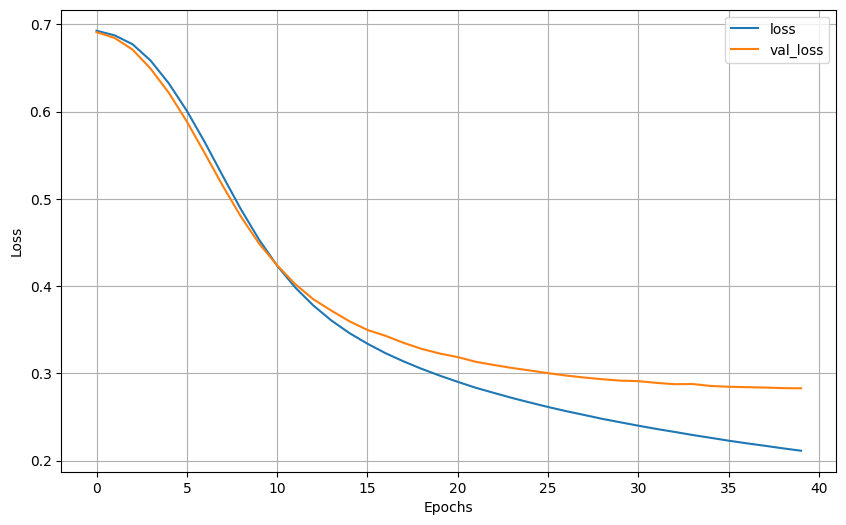

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(10,6))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
